In [ ]:
Author: Lauren Biermann, School of Biological & Marine Sciences, University of Plymouth adapted by Ben Holcombe
Credit: This code was adapted for UoP Final Year Dissertation Project from notebooks orignally developed for the OS209 and MAR518 modules: Marine Remote Sensing
Date: 18/11/24                                                                                                        

In [1]:
%matplotlib inline
# Plot
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.dates import DateFormatter, YearLocator

# Data 
import netCDF4 as nc
import numpy as np
import pandas as pd

# Stats
import pymannkendall as mk
from scipy.stats import linregress

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
OC = pd.read_csv("cmems_obs-oc_glo_bgc-plankton_my_l4-gapfree-multi-4km_P1D_1732033374666.csv")
OC.head(3)

,time,CHL
0,2000-01-01T00:00:00.000Z,0.156042
1,2000-01-02T00:00:00.000Z,0.150523
2,2000-01-03T00:00:00.000Z,0.146999


In [3]:
# Make a subset dataframe of the date and mean CHL for further processing
df = pd.DataFrame({'Date':OC['time'], 'Chl':OC['CHL']})

In [4]:
# Make date format more friendly to use
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%dT%H:%M:%S.%fZ') 
df.head(4)

,Date,Chl
0,2000-01-01,0.156042
1,2000-01-02,0.150523
2,2000-01-03,0.146999
3,2000-01-04,0.146910


In [5]:
# Data Prep for Linear regression:
x_date = df['Date']              # Your actual dates
x_num1 = dates.date2num(x_date)  # Convert dates to numerical format
CHL = df["Chl"]                  # Your CHL data

# Perform linear regression
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(x_num1, CHL)

# Calculate the trendlines
trend_CHL = slope1 * x_num1 + intercept1

In [6]:
# Ensure 'Date' is a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Split the data into two sets: before 2011 and after (including 2011)
df_Be = df[df['Date'] < '2010-12-31']
df_Af = df[(df['Date'] >= '2011-01-01') & (df['Date'] < '2024-01-01')]
 
# Reset the index for DF after 2011
df_Af = df_Af.reset_index(drop=True)

# Display the two datasets
print("Data before 2011:")
print(df_Be.head(3))

print("\nData from 2011 onwards:")
print(df_Af.tail(3))

Data before 2011:
        Date       Chl
0 2000-01-01  0.156042
1 2000-01-02  0.150523
2 2000-01-03  0.146999

Data from 2011 onwards:
           Date       Chl
4745 2023-12-29  0.161442
4746 2023-12-30  0.166694
4747 2023-12-31  0.155686


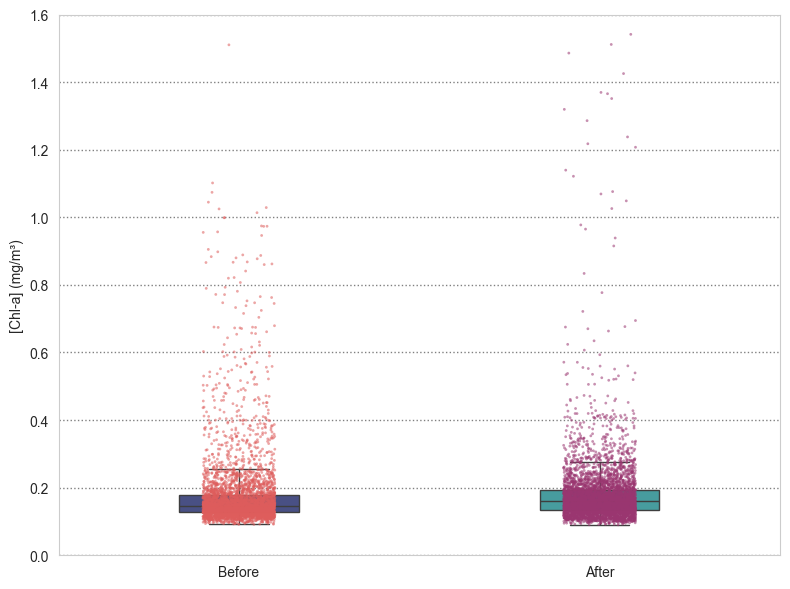

In [7]:
# Create the boxplots for 'Chl' and 'Std'
box1 = pd.DataFrame({'Before': df_Be['Chl'], 'After': df_Af['Chl']})
#box2 = pd.DataFrame({'Before': df_Be['Std'], 'After': df_Af['Std']})

# Set the overall style
sns.set_style('whitegrid')
# Create a figure with two subplots (1 row, 2 columns)
fig3, (ax1) = plt.subplots(1, 1, figsize=(8, 6))  # Adjust figsize as needed
#-----------------------------------------------------------------------------------------------------------
# Plot the 'Chl' boxplot in the first subplot
sns.boxplot(data=box1, width=0.33, palette="mako", flierprops=dict(marker=''), ax=ax1)
sns.stripplot(data=box1, palette="flare", s=2, jitter=True, alpha=0.55, ax=ax1)

# Limits, Gridlines, Title
ax1.set_ylim([0, 1.6])  # Set y-limits for 'Chl'
ax1.set_ylabel('[Chl-a] (mg/m³)', fontsize=10)
ax1.grid(True, linestyle=':', linewidth=1, color='gray', axis='y')

#-----------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------
# Adjust the layout to prevent overlap
plt.tight_layout()
# Show the plot
plt.show()

fig3.savefig('BoxplotDaily', bbox_inches='tight')

In [8]:
# Significant CHL?
trend3 = mk.original_test(df_Be['Chl'])
trend4 = mk.original_test(df_Af['Chl'])
print("Trend before:",trend3[0], ", p-value =", ("%.3f" % trend3[2]))
print("Trend after:", trend4[0], ", p-value =", ("%.3f" % trend4[2]))

Trend before: decreasing , p-value = 0.036
Trend after: increasing , p-value = 0.000


In [9]:
# Assessment of Trends in CHL before and after invasions commenced:
# Before
date_be = df_Be['Date']              
x_num1 = dates.date2num(date_be)
CHL_be = df_Be['Chl'] 
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(x_num1, CHL_be)
# After
date_af = df_Af['Date']              
x_num2 = dates.date2num(date_af)
CHL_af = df_Af['Chl']                  
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(x_num2, CHL_af)

In [10]:
# Trendlines
trend_Be = slope1 * x_num1 + intercept1  
trend_Af = slope2 * x_num2 + intercept2    

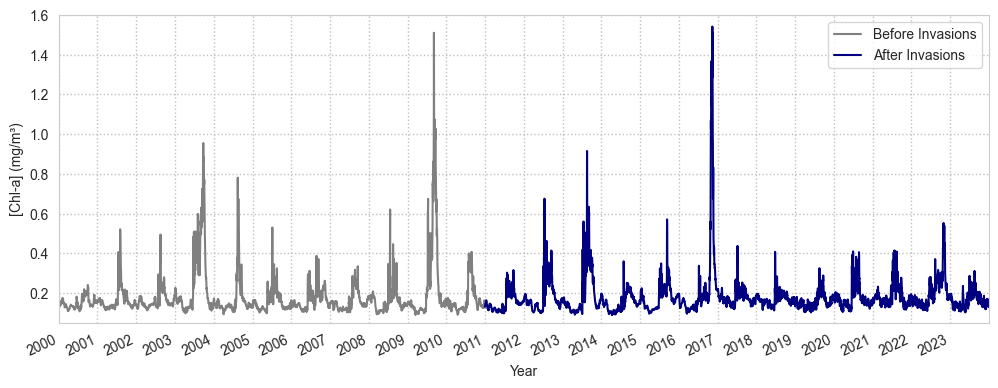

In [11]:
fig4, ax = plt.subplots(figsize=(12, 4))

# Set x-axis to show years only
ax.xaxis.set_major_locator(YearLocator(1))
date_form = DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_form)

# Plot the 'Before' data
ax.plot(df_Be['Date'], df_Be['Chl'], linewidth=1.5, c='grey', linestyle='-', label='Before Invasions')
# Plot the 'After' data
ax.plot(df_Af['Date'], df_Af['Chl'], linewidth=1.5, c='navy', linestyle='-', label='After Invasions')

# Formatting the plot nicely
ax.set_xlim([df_Be['Date'].min(), df_Af['Date'].max()])
plt.setp(ax.get_xticklabels(), rotation=25, ha="right")
# Set y-axis limits for second axis (Std)
ax.set_ylim([0.05, 1.6])
ax.grid(True, color='silver', linestyle=':', linewidth=1)

# Add labels to axes
ax.set_xlabel('Year')
ax.set_ylabel('[Chl-a] (mg/m³)')

# Add a legend
ax.legend()
# Show the plot
plt.show()

fig4.savefig('TimeSeriesNoLine', bbox_inches='tight')

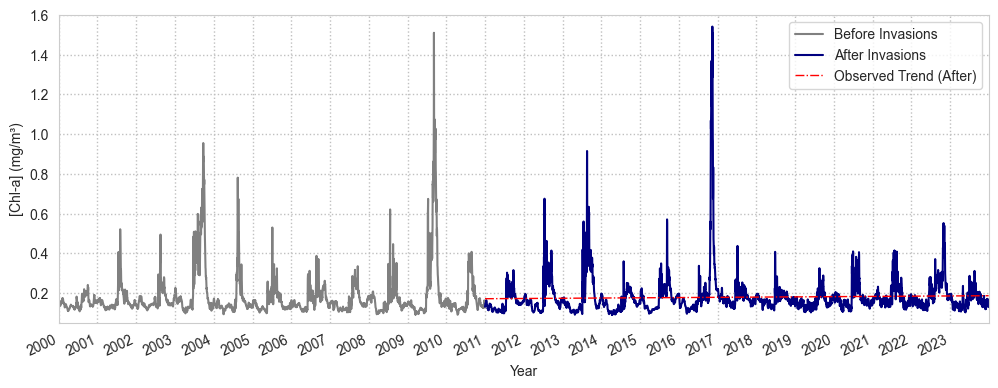

In [12]:
fig4, ax = plt.subplots(figsize=(12, 4))

# Set x-axis to show years only
ax.xaxis.set_major_locator(YearLocator(1))
date_form = DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_form)

# Plot the 'Before' data
ax.plot(df_Be['Date'], df_Be['Chl'], linewidth=1.5, c='grey', linestyle='-', label='Before Invasions')
# Plot the 'After' data
ax.plot(df_Af['Date'], df_Af['Chl'], linewidth=1.5, c='navy', linestyle='-', label='After Invasions')

# Plot the 'After' trendline
ax.plot(dates.num2date(x_num2), trend_Af, linewidth=1.0, c='red', linestyle='-.', 
        label='Observed Trend (After)')

# Formatting the plot nicely
ax.set_xlim([df_Be['Date'].min(), df_Af['Date'].max()])
plt.setp(ax.get_xticklabels(), rotation=25, ha="right")
# Set y-axis limits for second axis (Std)
ax.set_ylim([0.05, 1.6])
ax.grid(True, color='silver', linestyle=':', linewidth=1)

# Add labels to axes
ax.set_xlabel('Year')
ax.set_ylabel('[Chl-a] (mg/m³)')

# Add a legend
ax.legend()
# Show the plot
plt.show()

fig4.savefig('TimeSeries', bbox_inches='tight')

In [13]:
# Ensure 'Date' is in datetime format
df_Be['Date'] = pd.to_datetime(df_Be['Date'])
df_Af['Date'] = pd.to_datetime(df_Af['Date'])

# Extract month from 'Date' column and calculate monthly mean for 'before' period
df_Be['Month'] = df_Be['Date'].dt.month
monthly_Be = df_Be.groupby('Month').mean()

# Extract month from 'Date' column and calculate monthly mean for 'after' period
df_Af['Month'] = df_Af['Date'].dt.month
monthly_Af = df_Af.groupby('Month').mean()

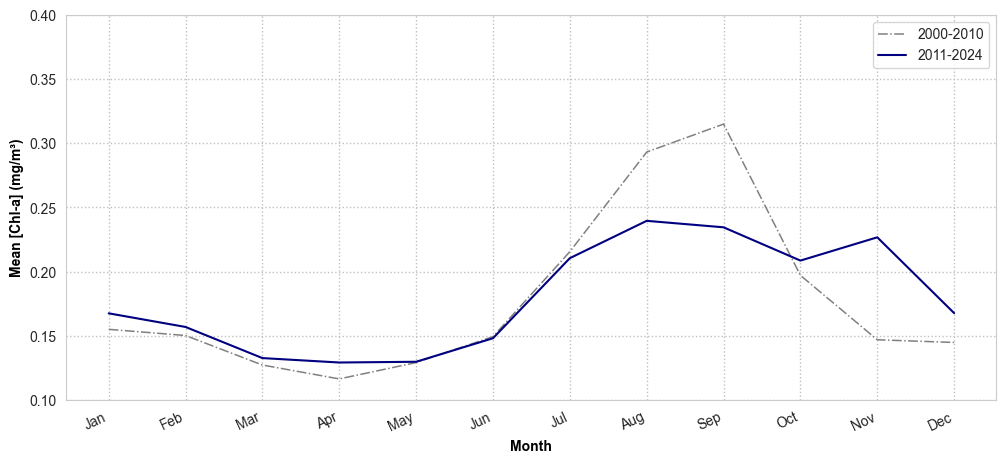

In [14]:
# Plot the seasonal patterns
fig6, ax = plt.subplots(figsize=(12, 5))

# Plot for 'before' period
ax.plot(monthly_Be.index, monthly_Be['Chl'], color='grey', linewidth=1.1,
       linestyle='-.', label='2000-2010')
# Plot for 'after' period
ax.plot(monthly_Af.index, monthly_Af['Chl'], color='navy', linewidth=1.5,
       linestyle='-', label='2011-2024')

# Add labels and title
ax.set_xlabel('Month', fontweight='bold', c='k', fontsize=10)
ax.set_ylabel('Mean [Chl-a] (mg/m\u00b3)', fontweight='bold', c='k', fontsize=10)

# Set x-ticks to show months (1-12)
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.setp(ax.get_xticklabels(), rotation=25, ha="right")

# Set y-axis limits
ax.set_ylim([0.1, 0.4])
# Add gridlines
ax.grid(True, color='silver', linestyle=':', linewidth=1)

# Add a legend
ax.legend()
# Show the plot
plt.show()

fig6.savefig('Seasonal Cycle', bbox_inches='tight')